In [2]:
import pandas as pd
import yfinance as yf

In [3]:
import numpy as np
from numpy import linalg as LA
from scipy import stats
from matplotlib import pyplot as plt

In [15]:
tickers = ['DPW.DE','ALV.DE']
startinput = "2017-01-01"
endinput = "2017-12-31"

In [16]:
alpha_conf = 0.95 # level of confidence for the mean vector estimator

In [17]:
S=pd.DataFrame()

In [18]:
for t in tickers:
    data= yf.download(tickers = t,
                        start=startinput,
                        end=endinput,
                        interval = "1d",
                        auto_ajust = True,
                        threads = True,
                           )
    display(data["Adj Close"])
    S[t]=data["Adj Close"]

[*********************100%***********************]  1 of 1 completed


Date
2017-01-02    25.519751
2017-01-03    25.601025
2017-01-04    25.458797
2017-01-05    25.889545
2017-01-06    25.901737
                ...    
2017-12-21    34.169418
2017-12-22    33.993137
2017-12-27    34.089676
2017-12-28    33.690941
2017-12-29    33.367756
Name: Adj Close, Length: 255, dtype: float64

[*********************100%***********************]  1 of 1 completed


Date
2017-01-02    124.379189
2017-01-03    126.158302
2017-01-04    126.830399
2017-01-05    127.067619
2017-01-06    127.383919
                 ...    
2017-12-21    162.166214
2017-12-22    161.339890
2017-12-27    160.389618
2017-12-28    159.687241
2017-12-29    158.241165
Name: Adj Close, Length: 255, dtype: float64

In [20]:
# mean vector and covariance variance
R=pd.DataFrame()
Covar = pd.DataFrame()
Mean = pd.DataFrame()
R=np.log(S) - np.log(S.shift(1))
R=R[1:]
Mean = R.mean()
Covar = R.cov()

In [21]:
# calculation q(alpha_conf)

In [22]:
n = len(R)
d = len(tickers)
dist = stats.f(d,n-d)

In [23]:
[a,b] = dist.interval(2*alpha_conf  -1)

In [24]:
q= float(d) / float(n-d)*float(b) # calculate q(alpha_conf)

In [26]:
# calculation of the avg fraction of time between tro observations
Ys= int ( startinput [0:4])
Ms= int ( startinput [5:7])
Ds= int ( startinput [8:10])
Ye= int ( endinput [0:4])
Me= int ( endinput [5:7])
De= int ( endinput [8:10])

In [27]:
import datetime
startdate = datetime.date(Ys,Ms,Ds)
enddate = datetime.date(Ye,Me,De)
z=enddate - startdate
Duration = float (z.days ) # calculate the number of calendar days


In [28]:
m = float ( len (R) - 1)

In [29]:
delta_t = Duration/365*m # calculate the time interval delta

In [30]:
delta_t

252.3068493150685

In [33]:
# calculation of the elipse characteristics for M


In [34]:
w,v = LA.eig(Covar)

In [36]:
arg = pd.DataFrame()
x = pd.DataFrame()
y = pd.DataFrame()


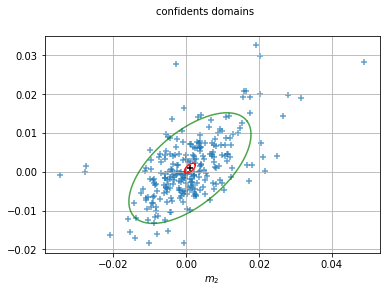

In [45]:
fig,ax = plt.subplots()
brg = list(range(100))
arg = list(range(100))
for i in brg: arg[i] = brg[i]*2*np.pi/99 # list of angles between  0 a 2pi.
x= np.cos(arg)*np.sqrt(q*w[0])*v.T[0][0] + np.sin(arg)*np.sqrt(q*w[1])*v.T[1][0] + Mean[0]
y= np.cos(arg)*np.sqrt(q*w[0])*v.T[0][1] + np.sin(arg)*np.sqrt(q*w[1])*v.T[1][1] + Mean[1]
z1=R["DPW.DE"]
z2=R["ALV.DE"]

plt.scatter(z1,z2,marker="+",alpha=0.7)
plt.plot(x,y,alpha=0.9,color="red")
plt.scatter(Mean[0],Mean[1],color="black",marker="+")
plt.xlabel(r'$m_1$')
plt.xlabel(r'$m_2$')
plt.suptitle("confidents domains ",size="medium")
plt.grid()

beta =0.95 # level of confidence
Ex = pd . DataFrame ( )
Ey = pd . DataFrame ( )
distchi = stats . chi2 (2)
Ea , Eb = dist.interval(2*beta-1)
p=Eb
Ex = np.cos(arg)*np.sqrt(p*w[0])*v.T[0][0]+ np.sin(arg)*np.sqrt(p*w[1])*v.T[1][0]+Mean[0]
Ey = np.cos(arg)*np.sqrt(p*w[0])*v.T[0][1]+ np.sin(arg)*np.sqrt(p*w[1])*v.T[1][1]+Mean[1]
plt.plot(Ex,Ey,alpha=0.7,color ="green")
plt.show()